## bank-marketing 데이터분석 & 시각화

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [ ]:
'''
- 각 열에 대한 시각화
- 정기예금과 일반 변수와의 관계(수치 또는 시각화)
- 상관계수 및 시각화
- 나이에 따른 정기예금 신청 여부 
'''

### 기본 형태

In [2]:
bank=pd.read_csv('../../data/bank/bank.csv', sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
bank.shape

(4521, 17)

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
print([bank.dtypes[i] for i in range(len(bank.columns))])

[dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O')]


## 각 열에 대한 시각화

### 기본 통계

In [14]:
# age
bin=[0,19,29,39,49,59,100]
bank['ageGroup'] = pd.cut(
    bank.age, 
    bins=bin, 
    labels=['20대 미만', '20대', '30대', '40대', '50대', '60대 이상'])

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ageGroup
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,30대
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,30대
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,30대
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,30대
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,50대


<AxesSubplot:xlabel='ageGroup', ylabel='count'>

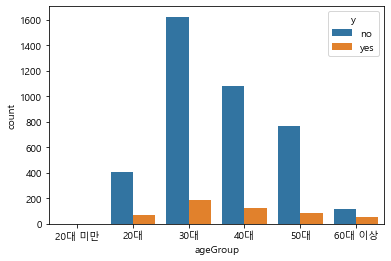

In [63]:
sns.countplot(x='ageGroup', data=bank, hue='y')

In [21]:
print(bank.job.unique())
print(len(bank.job.unique()))

['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
12


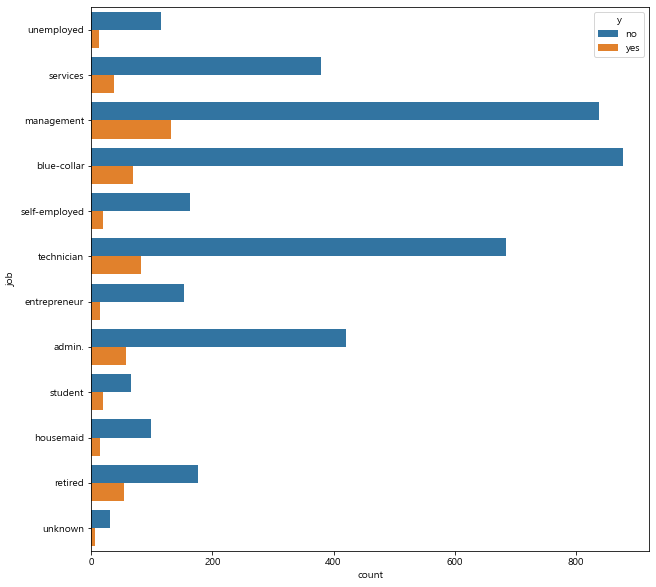

In [144]:
fig = plt.figure(figsize=(10,10))
sns.countplot(y='job', data=bank, hue='y')
plt.xticks(rotation=00)
plt.show()

In [30]:
bank.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

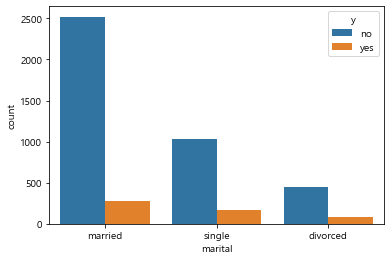

In [145]:
sns.countplot(x='marital', data=bank, hue='y')

In [31]:
bank.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

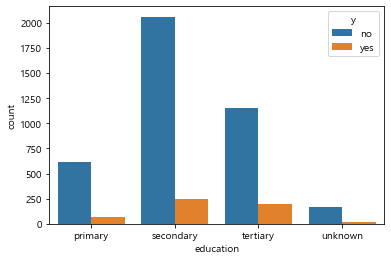

In [146]:
sns.countplot(x='education', data=bank, hue='y')

In [32]:
bank.default.value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [33]:
bank.housing.value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing', ylabel='count'>

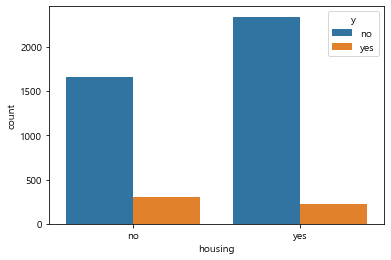

In [148]:
sns.countplot(x='housing', data=bank, hue='y')

In [34]:
bank.loan.value_counts()

no     3830
yes     691
Name: loan, dtype: int64

<AxesSubplot:xlabel='contact', ylabel='count'>

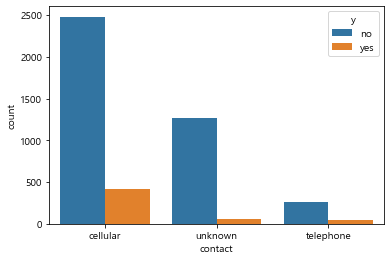

In [149]:
sns.countplot(x='contact', data=bank, hue='y')

<AxesSubplot:xlabel='campaign', ylabel='Count'>

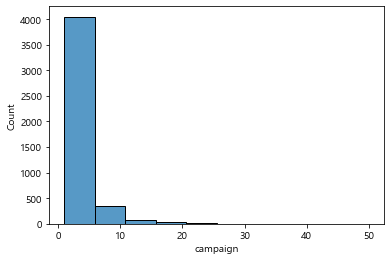

In [38]:
sns.histplot(x='campaign', bins=10 ,data=bank)

(0.0, 500.0)

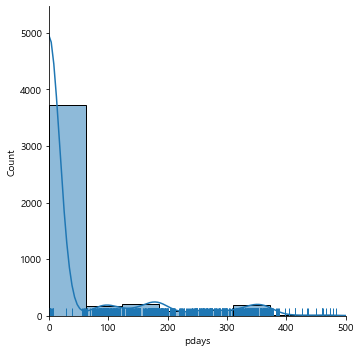

In [42]:
sns.displot(x='pdays', data=bank, kde=True, rug=True)
plt.xlim(0,500)

## y=정기예금 (yes or no)

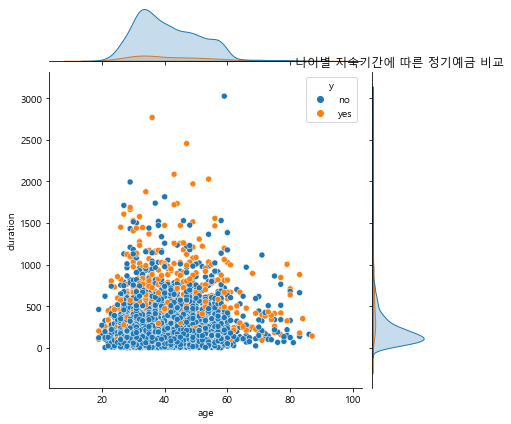

In [49]:
sns.jointplot(x='age', y='duration', data=bank, hue='y')
plt.title('나이별 지속기간에 따른 정기예금 비교')
plt.show()

In [53]:
# sns.pairplot(data=bank, hue='y')

# 해봐야 할 것 : 
# age와 (balance, duration)
# balance는 아무 상관 X
# day와 duration
# duration와 (balance, campaign, pdays, previous)

In [69]:
bank['ageGroup'] =  bank['ageGroup'].astype('object')

In [79]:
bank_job = bank.pivot_table(
    index='job', columns='y', aggfunc='size'
)

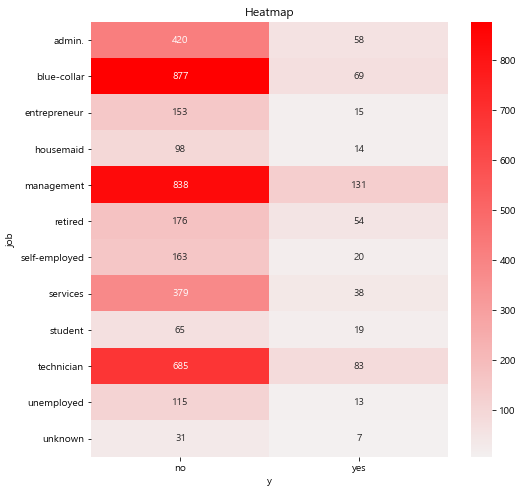

In [83]:
plt.figure(figsize=(8,8))
sns.heatmap(bank_job, cmap=sns.light_palette(
    'red', as_cmap=True), annot=True, fmt='d'
)
plt.title('Heatmap')
plt.show()

In [95]:
# colormap = plt.cm.PuBu 
# plt.figure(figsize=(10, 8)) 
# plt.title("Person Correlation of Features", y = 1.05, size = 15) 
# sns.heatmap(bank.corr(), 
# linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, 
# linecolor = "white", annot = True, annot_kws = {"size" : 16},
# )

In [96]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
 17  ageGroup   4521 non-null   object
dtypes: int64(7), object(11)
memory usage: 635.9+ KB


In [99]:
bank.duplicated().sum()

0

In [151]:
bank['y_value'] = bank['y'].map(dict(yes=1, no=0))
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ageGroup,y_value
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,30대,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,30대,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,30대,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,30대,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,50대,0


<BarContainer object of 12 artists>

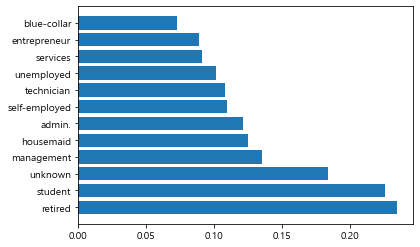

In [157]:
bank_job = bank.groupby('job').mean()['y_value'].sort_values(ascending=False)
plt.barh(bank_job.index, bank_job)

<BarContainer object of 6 artists>

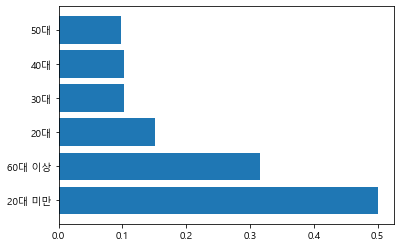

In [158]:
bank_job = bank.groupby('ageGroup').mean()['y_value'].sort_values(ascending=False)
plt.barh(bank_job.index, bank_job)

<BarContainer object of 3 artists>

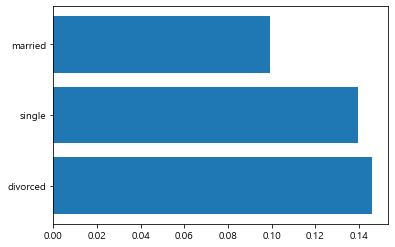

In [159]:
bank_job = bank.groupby('marital').mean()['y_value'].sort_values(ascending=False)
plt.barh(bank_job.index, bank_job)

<AxesSubplot:xlabel='ageGroup', ylabel='duration'>

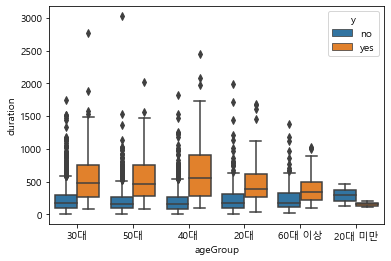

In [160]:
sns.boxplot(x='ageGroup', y='duration', data=bank, hue='y')

<AxesSubplot:xlabel='ageGroup', ylabel='duration'>

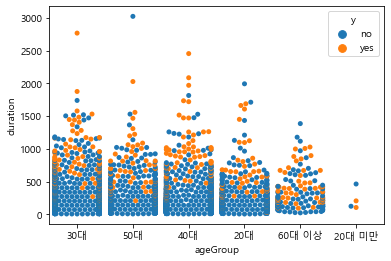

In [161]:
sns.swarmplot(x='ageGroup', y='duration', data=bank, hue='y')